In [70]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA as pca
from sklearn.decomposition import SparsePCA as spca
from sklearn.decomposition import DictionaryLearning as dl
from sklearn.linear_model import OrthogonalMatchingPursuit as omp
from sklearn.decomposition import FastICA as fica

import os

In [7]:
data_path = 'data'

In [8]:
swaps_df = pd.read_csv(os.path.join(os.path.abspath('..'),data_path, 'usd_swap_libor_3m.csv'))

In [9]:
swaps_df

,Date,3m,6m,1y,2y,3y,4y,5y,6y,7y,...,15y,16y,17y,18y,19y,20y,25y,30y,40y,50y
0,04/17/2020,1.12132,0.750845,0.542632,0.415995,0.404818,0.432852,0.480290,0.538711,0.596334,...,0.832237,0.844088,0.855402,0.866058,0.875499,0.883368,0.899930,0.906719,0.869219,0.786719
1,04/16/2020,1.14786,0.769438,0.553294,0.417850,0.401816,0.424998,0.465812,0.517015,0.567523,...,0.778155,0.789119,0.799571,0.809517,0.818363,0.825697,0.840490,0.846255,0.808755,0.726255
2,04/15/2020,1.14749,0.753579,0.540678,0.409915,0.396697,0.421523,0.464231,0.521136,0.577026,...,0.817662,0.830707,0.843072,0.854822,0.865210,0.873922,0.894239,0.904266,0.866766,0.784266
3,04/14/2020,1.18920,0.797929,0.569167,0.436103,0.438777,0.485574,0.548139,0.615538,0.678522,...,0.953020,0.967948,0.981887,0.994876,1.006450,1.016070,1.040560,1.054670,1.017170,0.934674
4,04/13/2020,1.23242,0.836878,0.599714,0.457200,0.458603,0.505609,0.565400,0.627168,0.684601,...,0.937401,0.951133,0.964234,0.976642,0.987715,0.997055,1.019550,1.032200,0.994699,0.912199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7631,01/05/1990,8.30204,8.347400,8.250600,8.411990,8.526850,8.599060,8.702640,8.774680,8.816610,...,8.847970,8.848360,8.848700,8.848990,8.849790,8.850010,8.851140,8.851800,8.852570,8.852820
7632,01/04/1990,8.30394,8.348040,8.252340,8.429010,8.541000,8.611810,8.699000,8.766870,8.810640,...,8.830640,8.830250,8.829890,8.829590,8.829850,8.829590,8.829060,8.828770,8.828590,8.828470
7633,01/03/1990,8.36304,8.287810,8.196780,8.434840,8.552320,8.631280,8.707390,8.765640,8.804040,...,8.813640,8.812760,8.812000,8.811350,8.811320,8.810800,8.809330,8.808490,8.807780,8.807450
7634,01/02/1990,8.36303,8.287600,8.193170,8.303130,8.462500,8.576230,8.629220,8.689500,8.740070,...,8.734410,8.732040,8.729980,8.728190,8.727170,8.725780,8.721200,8.718550,8.716060,8.715010


In [10]:
df = swaps_df.head(90).set_index('Date')

In [11]:
df = df.diff().dropna()

In [12]:
df = df.reset_index(drop=True)

In [13]:
pc = pca(n_components=4)

In [14]:
pc.fit(df)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [15]:
pc.components_

array([[-0.04472288, -0.06720927, -0.07665984, -0.09537384, -0.11461962,
        -0.13910641, -0.15573491, -0.17202901, -0.18549676, -0.19551897,
        -0.20390435, -0.210366  , -0.21545968, -0.21958385, -0.22281419,
        -0.22533429, -0.22729844, -0.22879819, -0.22988655, -0.23070346,
        -0.23137802, -0.23198433, -0.23445943, -0.23563733, -0.23504725,
        -0.23550814],
       [ 0.62161951,  0.50191119,  0.39273857,  0.27942643,  0.20382706,
         0.13665232,  0.0882258 ,  0.06005389,  0.03732565,  0.01820325,
         0.00215007, -0.01073279, -0.02164457, -0.03078829, -0.03818069,
        -0.0446555 , -0.05033181, -0.05526334, -0.0595037 , -0.06319307,
        -0.06626395, -0.06910799, -0.07993686, -0.08651235, -0.08664147,
        -0.08579116],
       [ 0.45560913,  0.12565017, -0.07027348, -0.21591118, -0.2769345 ,
        -0.3001803 , -0.3084346 , -0.2803163 , -0.23885378, -0.19593904,
        -0.15669793, -0.11747558, -0.07909893, -0.04259015, -0.00910963,
       

In [16]:
np.linalg.norm(pc.components_, axis=1)

array([1., 1., 1., 1.])

In [17]:
pc.explained_variance_

array([0.12760124, 0.00596048, 0.00286812, 0.00051988])

In [18]:
spc = spca(n_components=3, random_state=0, alpha=0.05, ridge_alpha=0.001, tol=1e-04, max_iter=10000)

In [19]:
spc.fit(df)

SparsePCA(U_init=None, V_init=None, alpha=0.05, max_iter=10000, method='lars',
          n_components=3, n_jobs=None, normalize_components='deprecated',
          random_state=0, ridge_alpha=0.001, tol=0.0001, verbose=False)

In [20]:
df1 = pd.DataFrame(np.transpose(spc.components_))

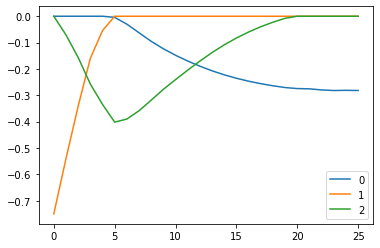

In [21]:
df1.plot()

In [178]:
spc.components_

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.01802092, -0.05129203, -0.08489207, -0.11446516,
        -0.14031822, -0.16337852, -0.18418009, -0.20291916, -0.21927638,
        -0.23329169, -0.24532624, -0.25562375, -0.26424309, -0.27153755,
        -0.27778217, -0.28043372, -0.28474521, -0.28710618, -0.28633499,
        -0.2869826 ],
       [-0.74380318, -0.54223801, -0.34745176, -0.16760046, -0.06262682,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        , -0.06245234, -0.14247654, -0.23834163, -0.31273062,
        -0.38811215, -0.39404715, -0.36488323, -0.32599765, -0.28603344,
        -0.24991071, -0.21448494, -0.18022056, -0.14789131, -0.11850634,
       

In [89]:
nd = np.array(df)

In [93]:
spc.fit(nd)

SparsePCA(U_init=None, V_init=None, alpha=1, max_iter=1000, method='lars',
          n_components=4, n_jobs=None, normalize_components='deprecated',
          random_state=0, ridge_alpha=0.1, tol=1e-08, verbose=False)

In [96]:
spc.components_

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [22]:
dle = dl(n_components=4)

In [23]:
dle.fit(df)

DictionaryLearning(alpha=1, code_init=None, dict_init=None,
                   fit_algorithm='lars', max_iter=1000, n_components=4,
                   n_jobs=None, positive_code=False, positive_dict=False,
                   random_state=None, split_sign=False, tol=1e-08,
                   transform_algorithm='omp', transform_alpha=None,
                   transform_max_iter=1000, transform_n_nonzero_coefs=None,
                   verbose=False)

In [24]:
dle.components_

array([[-0.02770761, -0.03331996, -0.04054334, -0.0557589 , -0.07559473,
        -0.11589074, -0.12362556, -0.15611164, -0.18102442, -0.19785033,
        -0.21007813, -0.21910857, -0.22545449, -0.23069101, -0.23413918,
        -0.23577292, -0.23623444, -0.23619577, -0.23601928, -0.23592528,
        -0.23595844, -0.23604802, -0.23584357, -0.23528536, -0.23528536,
        -0.23528536],
       [ 0.30347488,  0.09167995,  0.05138468, -0.17068521, -0.05175184,
         0.09910419, -0.00870422, -0.37308315,  0.11727634,  0.21352117,
         0.13418476,  0.40198122,  0.06126138,  0.37457538, -0.09798094,
         0.0216515 , -0.15700567,  0.01001532,  0.16713595,  0.0475572 ,
        -0.14506888, -0.12079064,  0.3183531 ,  0.33020806,  0.14711455,
         0.01666572],
       [ 0.18519441, -0.07507261,  0.26589363, -0.07312529, -0.06120379,
         0.25835206, -0.3825267 , -0.20697568,  0.31241971,  0.31468182,
         0.13805851,  0.14217894, -0.02484944,  0.12835176, -0.2022965 ,
       

In [30]:
df_r = pd.DataFrame(dle.fit_transform(df))

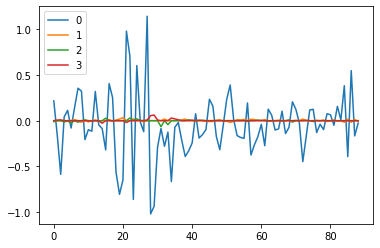

In [31]:
df_r.plot()

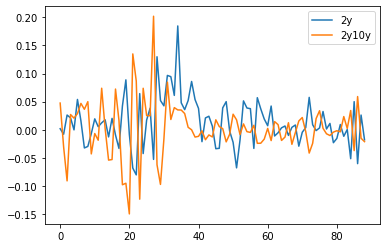

In [67]:
df1 = pd.DataFrame()
df1['2y'] = df['2y']
df1['2y10y'] = df['2y'] - df['10y']
# df1['2y30y'] = df['2y'] - df['30y']
df1.plot()

In [68]:
ompe = omp().fit(df, df1)

C:\Users\swami\.conda\envs\quant-projects\lib\site-packages\sklearn\linear_model\_omp.py:673: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  return_n_iter=True)


In [71]:
fic = fica(n_components=4)

In [72]:
fic.fit_transform(df)

array([[-7.71807640e-02,  1.96004267e-03,  6.46824072e-02,
         6.25464449e-02],
       [ 1.26092207e-01, -1.01912319e-01, -2.52648487e-02,
        -6.51438259e-02],
       [ 1.13029652e-01, -5.48009520e-02, -1.74438469e-01,
         2.42947703e-02],
       [-7.25217507e-02,  3.18181314e-02,  1.70737830e-02,
         9.13642895e-02],
       [-5.44058298e-02, -6.21713556e-03,  2.95594389e-02,
         1.36717067e-02],
       [-1.09542936e-01,  7.38308186e-02, -2.28406254e-02,
         2.19618709e-01],
       [-5.70237460e-02,  5.81803795e-02,  7.81305098e-02,
        -2.45252927e-03],
       [-1.46510370e-01, -1.35516250e-01, -9.45680041e-03,
         1.05050723e-01],
       [ 7.78451805e-02, -1.38765846e-01,  1.20271617e-01,
         3.71367554e-02],
       [ 9.19753027e-02, -8.39890782e-02, -5.86617298e-02,
        -8.34414839e-02],
       [ 8.25014417e-03, -8.04069856e-02, -5.55703335e-02,
         1.32402686e-01],
       [-1.65131059e-02, -5.24668440e-02, -6.81197746e-02,
      

In [77]:
df2 = pd.DataFrame(fic.mixing_)

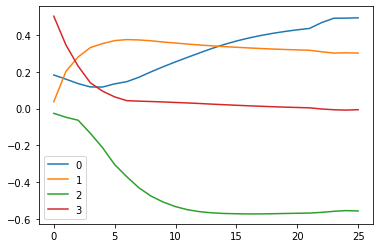

In [78]:
df2.plot()